In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('df_resampled_com_outliers.csv',sep=',')

In [3]:
df.head()

,data_hora,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
0,2023-01-29,22.969444,23.934722,21.926389,71.111111,76.722222,66.416667,17.176389,18.104167,16.406944,885.483333,885.819444,885.222222,2.709722,195.986111,6.022222,1580.177778,0.288889
1,2023-02-05,24.509524,25.198810,23.277381,62.500000,68.726190,59.011905,16.428571,17.429762,15.520238,887.184524,887.535714,886.983333,2.294048,133.404762,5.526190,1767.392857,0.147619
2,2023-02-12,25.157143,25.711905,24.029762,58.785714,64.428571,56.071429,16.003571,16.991667,15.226190,886.490476,886.877381,886.265476,2.236905,114.964286,5.552381,1762.996429,0.009524
3,2023-02-19,25.451190,26.028571,24.259524,58.630952,64.285714,55.392857,16.033333,16.938095,15.071429,885.277381,885.655952,885.064286,2.513095,147.797619,5.946429,1892.951190,0.114286
4,2023-02-26,24.008333,24.713095,23.009524,66.119048,71.095238,62.321429,16.939286,17.777381,16.035714,887.779762,888.135714,887.547619,2.292857,128.726190,5.638095,1735.534524,0.033333


In [4]:
df.shape

(105, 18)

In [5]:
df.columns

Index(['data_hora', 'Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)',
       'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)',
       'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
       'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)',
       'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)',
       'Radiacao (KJ/m²)', 'Chuva (mm)'],
      dtype='object')

In [6]:
X = df[['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)',
       'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)',
       'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
       'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)',
       'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)','Chuva (mm)']]
y = df['Radiacao (KJ/m²)']

In [7]:
# X = your feature matrix, y = your target variable
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
importances_series = pd.Series(importances, index=X.columns)

# Rank features based on importance
print(importances_series.sort_values(ascending=False))


Temp. Max. (C)          0.236239
Temp. Ins. (C)          0.189274
Temp. Min. (C)          0.152534
Umi. Min. (%)           0.106843
Dir. Vento (m/s)        0.058179
Vel. Vento (m/s)        0.044927
Umi. Ins. (%)           0.044243
Raj. Vento (m/s)        0.032571
Pto Orvalho Min. (C)    0.019436
Pressao Min. (hPa)      0.019034
Pressao Max. (hPa)      0.018789
Chuva (mm)              0.018512
Umi. Max. (%)           0.016563
Pto Orvalho Max. (C)    0.015339
Pressao Ins. (hPa)      0.013948
Pto Orvalho Ins. (C)    0.013568
dtype: float64


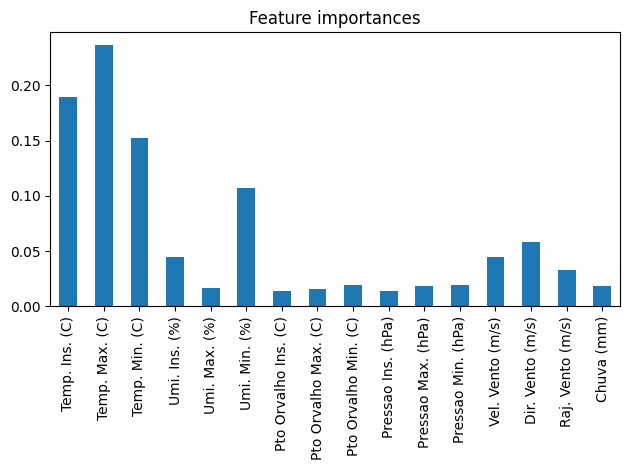

In [8]:
forest_importances = pd.Series(importances_series, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
#ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<h2>Random Forest Regressor com o DF original, sem média semanal </h2>

In [9]:
df2 = pd.read_csv('df_original_limpo.csv',sep=',')

In [10]:
df2.shape

(8784, 18)

In [11]:
X = df2[['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)',
       'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)',
       'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
       'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)',
       'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)','Chuva (mm)']]
y = df2['Radiacao (KJ/m²)']

In [12]:
# X = your feature matrix, y = your target variable
model = RandomForestRegressor()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
importances_series = pd.Series(importances, index=X.columns)

# Rank features based on importance
print(importances_series.sort_values(ascending=False))


Temp. Ins. (C)          0.466587
Pressao Max. (hPa)      0.111177
Vel. Vento (m/s)        0.070870
Raj. Vento (m/s)        0.068543
Pto Orvalho Max. (C)    0.046576
Temp. Min. (C)          0.042916
Temp. Max. (C)          0.032907
Dir. Vento (m/s)        0.029510
Pressao Min. (hPa)      0.025891
Pressao Ins. (hPa)      0.021161
Umi. Max. (%)           0.020754
Umi. Ins. (%)           0.018621
Pto Orvalho Min. (C)    0.015339
Umi. Min. (%)           0.015180
Pto Orvalho Ins. (C)    0.013405
Chuva (mm)              0.000566
dtype: float64


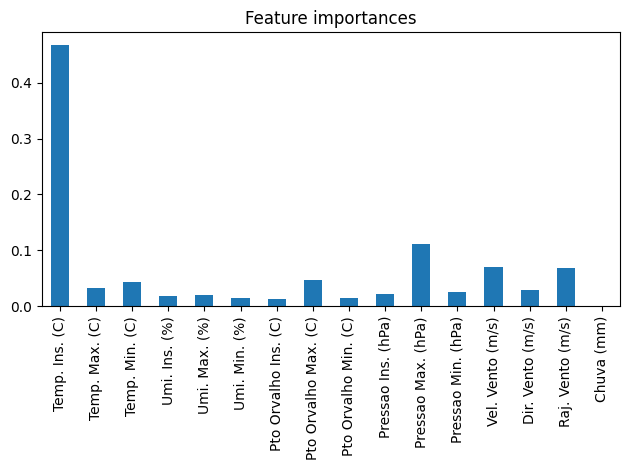

In [13]:
forest_importances = pd.Series(importances_series, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
#ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

<h2>Feature Engineering - SARIMAX</h2>

In [14]:
#Checkpoint
df_eng = df.copy()

In [15]:
df_eng.index

RangeIndex(start=0, stop=105, step=1)

In [18]:
df_eng['data_hora'] = pd.to_datetime(df_eng['data_hora'], format='%Y-%m-%d')
# Estabelecer 'data_hora' como o index
df_eng.set_index('data_hora', inplace=True)

In [19]:
df_eng.index

DatetimeIndex(['2023-01-29', '2023-02-05', '2023-02-12', '2023-02-19',
               '2023-02-26', '2023-03-05', '2023-03-12', '2023-03-19',
               '2023-03-26', '2023-04-02',
               ...
               '2024-11-24', '2024-12-01', '2024-12-08', '2024-12-15',
               '2024-12-22', '2024-12-29', '2025-01-05', '2025-01-12',
               '2025-01-19', '2025-01-26'],
              dtype='datetime64[ns]', name='data_hora', length=105, freq=None)

In [20]:
df_eng.head()

,Temp. Ins. (C),Temp. Max. (C),Temp. Min. (C),Umi. Ins. (%),Umi. Max. (%),Umi. Min. (%),Pto Orvalho Ins. (C),Pto Orvalho Max. (C),Pto Orvalho Min. (C),Pressao Ins. (hPa),Pressao Max. (hPa),Pressao Min. (hPa),Vel. Vento (m/s),Dir. Vento (m/s),Raj. Vento (m/s),Radiacao (KJ/m²),Chuva (mm)
data_hora,,,,,,,,,,,,,,,,,
2023-01-29,22.969444,23.934722,21.926389,71.111111,76.722222,66.416667,17.176389,18.104167,16.406944,885.483333,885.819444,885.222222,2.709722,195.986111,6.022222,1580.177778,0.288889
2023-02-05,24.509524,25.198810,23.277381,62.500000,68.726190,59.011905,16.428571,17.429762,15.520238,887.184524,887.535714,886.983333,2.294048,133.404762,5.526190,1767.392857,0.147619
2023-02-12,25.157143,25.711905,24.029762,58.785714,64.428571,56.071429,16.003571,16.991667,15.226190,886.490476,886.877381,886.265476,2.236905,114.964286,5.552381,1762.996429,0.009524
2023-02-19,25.451190,26.028571,24.259524,58.630952,64.285714,55.392857,16.033333,16.938095,15.071429,885.277381,885.655952,885.064286,2.513095,147.797619,5.946429,1892.951190,0.114286
2023-02-26,24.008333,24.713095,23.009524,66.119048,71.095238,62.321429,16.939286,17.777381,16.035714,887.779762,888.135714,887.547619,2.292857,128.726190,5.638095,1735.534524,0.033333


In [21]:
df_eng['Mes'] = df_eng.index.month

In [27]:
df_eng['Ano'] = df_eng.index.year

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
def adf(df_eng):
    resultado = adfuller(df_eng)
    labels = ['Teste ADF','p-value','#Lags','No de observações']
    for value, label in zip(resultado,labels):
        print(label+':'+str(value))
        if resultado[1] <= 0.05:
            print(f"Dados estacionários")
        else:
            print(f"Dados não estacionários")
adf(df_eng['Radiacao (KJ/m²)'])

Teste ADF:-6.019896590645964
Dados estacionários
p-value:1.5024553364315228e-07
Dados estacionários
#Lags:0
Dados estacionários
No de observações:104
Dados estacionários


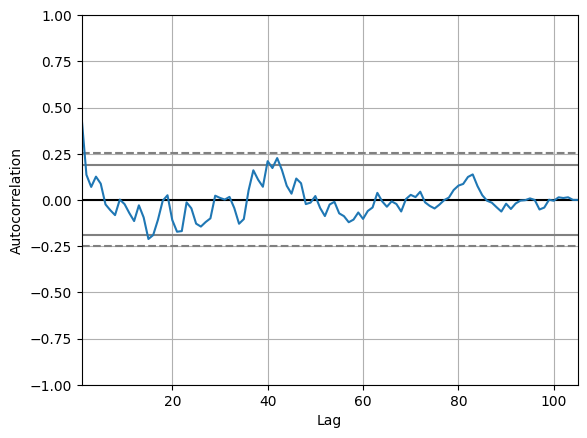

In [26]:
#Autocorrelação de Radiação
x = pd.plotting.autocorrelation_plot(df_eng['Radiacao (KJ/m²)']) 
x.plot()
plt.show()

In [31]:
X_eng = df_eng[['Temp. Ins. (C)', 'Temp. Max. (C)', 'Temp. Min. (C)',
       'Umi. Ins. (%)', 'Umi. Max. (%)', 'Umi. Min. (%)',
       'Pto Orvalho Ins. (C)', 'Pto Orvalho Max. (C)', 'Pto Orvalho Min. (C)',
       'Pressao Ins. (hPa)', 'Pressao Max. (hPa)', 'Pressao Min. (hPa)',
       'Vel. Vento (m/s)', 'Dir. Vento (m/s)', 'Raj. Vento (m/s)','Chuva (mm)','Mes','Ano']]
y_eng = df_eng['Radiacao (KJ/m²)']

In [32]:
# X = your feature matrix, y = your target variable
model = RandomForestRegressor()
model.fit(X_eng, y_eng)

# Get feature importances
importances = model.feature_importances_
importances_series = pd.Series(importances, index=X_eng.columns)

# Rank features based on importance
print(importances_series.sort_values(ascending=False))


Temp. Ins. (C)          0.216833
Temp. Max. (C)          0.207516
Temp. Min. (C)          0.122457
Umi. Min. (%)           0.117638
Mes                     0.061580
Dir. Vento (m/s)        0.049357
Vel. Vento (m/s)        0.037409
Umi. Ins. (%)           0.035222
Raj. Vento (m/s)        0.027418
Pto Orvalho Ins. (C)    0.019956
Umi. Max. (%)           0.018410
Pressao Max. (hPa)      0.016308
Pto Orvalho Min. (C)    0.014590
Pressao Ins. (hPa)      0.013572
Chuva (mm)              0.013539
Pressao Min. (hPa)      0.012437
Pto Orvalho Max. (C)    0.011540
Ano                     0.004218
dtype: float64


In [28]:
df_eng.to_csv('df_eng.csv',index=True)

<h2>Lag</h2>

In [ ]:
#Para o XGBOOST, o modelo necessariamente tem que ter o lag

<h4>Checkpoint 2</h4>

In [ ]:
df_eng2 = df_eng.copy()

In [ ]:
df_eng2['lag_1'] = df_eng2['Radiacao (KJ/m²)'].shift(1)